In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!nvidia-smi

Wed Aug 31 06:53:24 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## I. Download Dataset

### 1.1 Vietnamese_Dataset
https://github.com/VinAIResearch/dict-guided#dataset

Input format: x1,y1,x2,y2,x3,y3,x4,y4,TRANSCRIPT

In [1]:
%cd /content
!gdown https://drive.google.com/uc?id=1UUQhNvzgpZy7zXBFQp0Qox-BBjunZ0ml
!unzip vietnamese_original.zip

/content
Downloading...
From: https://drive.google.com/uc?id=1UUQhNvzgpZy7zXBFQp0Qox-BBjunZ0ml
To: /content/vietnamese_original.zip
100% 1.05G/1.05G [00:04<00:00, 246MB/s]
Archive:  vietnamese_original.zip
   creating: vietnamese/
  inflating: vietnamese/general_dict.txt  
  inflating: vietnamese/vn_dictionary.txt  
   creating: vietnamese/train_images/
  inflating: vietnamese/train_images/im0722.jpg  
  inflating: vietnamese/train_images/im0234.jpg  
  inflating: vietnamese/train_images/im0781.jpg  
  inflating: vietnamese/train_images/im0318.jpg  
  inflating: vietnamese/train_images/im0851.jpg  
  inflating: vietnamese/train_images/im1022.jpg  
  inflating: vietnamese/train_images/im0041.jpg  
  inflating: vietnamese/train_images/im1090.jpg  
  inflating: vietnamese/train_images/im0674.jpg  
  inflating: vietnamese/train_images/im1013.jpg  
  inflating: vietnamese/train_images/im0200.jpg  
  inflating: vietnamese/train_images/im1062.jpg  
  inflating: vietnamese/train_images/im0190.

### 1.2 QNAI Dataset

In [2]:
%cd /content
!gdown https://drive.google.com/uc?id=1dpbsK9bNklcE4FQ7WuEvT6wHo48ARM9y
!unzip AI_Hackathon_Problem1.zip

/content
Downloading...
From: https://drive.google.com/uc?id=1dpbsK9bNklcE4FQ7WuEvT6wHo48ARM9y
To: /content/AI_Hackathon_Problem1.zip
100% 503M/503M [00:02<00:00, 250MB/s]
Archive:  AI_Hackathon_Problem1.zip
   creating: AI Hackathon-Problem1/
  inflating: __MACOSX/._AI Hackathon-Problem1  
  inflating: AI Hackathon-Problem1/.DS_Store  
  inflating: __MACOSX/AI Hackathon-Problem1/._.DS_Store  
  inflating: AI Hackathon-Problem1/Data Labeling_Đề 01_ AI Hackathon.xlsx  
  inflating: __MACOSX/AI Hackathon-Problem1/._Data Labeling_Đề 01_ AI Hackathon.xlsx  
   creating: AI Hackathon-Problem1/Data Menu_Đề 1_AI Hackathon/
  inflating: __MACOSX/AI Hackathon-Problem1/._Data Menu_Đề 1_AI Hackathon  
  inflating: AI Hackathon-Problem1/Data Menu_Đề 1_AI Hackathon/723.jpeg  
  inflating: __MACOSX/AI Hackathon-Problem1/Data Menu_Đề 1_AI Hackathon/._723.jpeg  
  inflating: AI Hackathon-Problem1/Data Menu_Đề 1_AI Hackathon/689.jpeg  
  inflating: __MACOSX/AI Hackathon-Problem1/Data Menu

In [3]:
%cd '/content/AI Hackathon-Problem1'
!gdown https://drive.google.com/uc?id=1Y6uzqdXHJx6uLeLrFZgw8AF39t4eUkcs

/content/AI Hackathon-Problem1
Downloading...
From: https://drive.google.com/uc?id=1Y6uzqdXHJx6uLeLrFZgw8AF39t4eUkcs
To: /content/AI Hackathon-Problem1/label_sentences.txt
100% 1.22M/1.22M [00:00<00:00, 138MB/s]


In [4]:
%cd '/content/AI Hackathon-Problem1'
!gdown https://drive.google.com/uc?id=1QZxRRVYhnYwxWLvDCsnBIqOoAYdDd7_g

/content/AI Hackathon-Problem1
Downloading...
From: https://drive.google.com/uc?id=1QZxRRVYhnYwxWLvDCsnBIqOoAYdDd7_g
To: /content/AI Hackathon-Problem1/label_char.txt
100% 1.61M/1.61M [00:00<00:00, 200MB/s]


## II. Clone Code PaddleOCR

In [5]:
%cd /content
!git clone https://github.com/dotrannhattuong/Smart_menu_OCR.git

/content
Cloning into 'Smart_menu_OCR'...
remote: Enumerating objects: 423, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 423 (delta 19), reused 47 (delta 14), pack-reused 367
Receiving objects: 100% (423/423), 90.56 MiB | 21.89 MiB/s, done.
Resolving deltas: 100% (120/120), done.


In [6]:
%cd /content
!git clone https://github.com/PaddlePaddle/PaddleOCR.git

/content
Cloning into 'PaddleOCR'...
remote: Enumerating objects: 42195, done.
remote: Counting objects: 100% (435/435), done.
remote: Compressing objects: 100% (249/249), done.
remote: Total 42195 (delta 237), reused 337 (delta 186), pack-reused 41760
Receiving objects: 100% (42195/42195), 335.90 MiB | 22.68 MiB/s, done.
Resolving deltas: 100% (29644/29644), done.


## III. Install Enviroment

In [7]:
%cd /content/PaddleOCR
!pip install -r requirements.txt
!pip install paddlepaddle-gpu 
!pip install PyYAML==5.4.1
!pip3 install paddleslim==2.2.2
!pip install split-folders
!pip3 install lanms-nova

/content/PaddleOCR
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 604 kB 15.3 MB/s 
     |████████████████████████████████| 4.9 MB 64.2 MB/s 
     |████████████████████████████████| 2.2 MB 63.4 MB/s 
     |████████████████████████████████| 204 kB 75.4 MB/s 
     |████████████████████████████████| 104 kB 75.1 MB/s 
     |████████████████████████████████| 399 kB 75.5 MB/s 
     |████████████████████████████████| 2.3 MB 56.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 394.0 MB 23 kB/s 
     |████████████████████████████████| 394 kB 59.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 636 kB 441 kB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
 

## V. Text Recognition

Text Recognition: https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.5/doc/doc_en/recognition_en.md

### 5.1 Image Processing

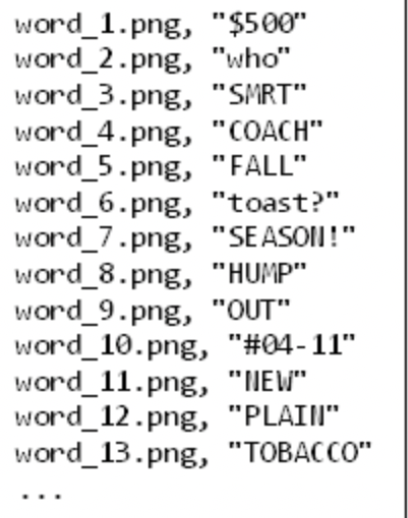

#### 5.1.1 Vietnamese_Data

In [8]:
import os

path = '/content/vietnamese/test_image'
files_test_image = os.listdir(path)
print('len_test: ', len(files_test_image))
print('min_test: ', min(files_test_image))
print('max_test: ', max(files_test_image))
print('-'*60)

path = '/content/vietnamese/train_images'
files = os.listdir(path)
print('len_train: ', len(files))
print('min_train: ', min(files))
print('max_train: ', max(files))
print('-'*60)

path = '/content/vietnamese/unseen_test_images'
files = os.listdir(path)
print('len_unseen: ', len(files))
print('min_unseen: ', min(files))
print('max_unseen: ', max(files))
print('-'*60)

path = '/content/vietnamese/labels'
files = [int(fl.split('.txt')[0].split('_')[1]) for fl in os.listdir(path)]
print('len_label: ', len(files))
print('min_label: ', min(files))
print('max_label: ', max(files))

len_test:  300
min_test:  im1201.jpg
max_test:  im1500.jpg
------------------------------------------------------------
len_train:  1200
min_train:  im0001.jpg
max_train:  im1200.jpg
------------------------------------------------------------
len_unseen:  500
min_unseen:  im1501.jpg
max_unseen:  im2000.jpg
------------------------------------------------------------
len_label:  2000
min_label:  1
max_label:  2000


In [9]:
import glob 
import json

path = glob.glob('/content/vietnamese/labels/*')

train_label = open("/content/vietnamese/train_label.txt","w")
test_label = open("/content/vietnamese/test_label.txt","w")
useen_label = open("/content/vietnamese/useen_label.txt","w")

for file in path:
  with open(file, 'r') as f:
    lines = f.readlines()
  
  label = []
  for line in lines:
    line = line.strip()
    text_box = {}
    c = line.split(',', 8)
    text_box["transcription"] = c[-1]
    text_box["points"] = [[c[0],c[1]],[c[2],c[3]], [c[4],c[5]],[c[6],c[7]]]
    label.append(text_box)

  label = json.dumps(label, ensure_ascii=False)
  label_name = os.path.basename(file).split('.')[0].split('_')[1]
  int_number = int(label_name)
  img_name = 'im' + "{:04n}".format(int(int_number)) + '.jpg'

  if int_number <= 1200:
    train_label.write('train_images/' + img_name + '\t' + f'{label}' + '\n')
  elif int_number > 1500:
    useen_label.write('unseen_test_images/' + img_name + '\t' + f'{label}' + '\n')
  else:
    test_label.write('test_image/' + img_name + '\t' + f'{label}' + '\n')

In [10]:
import os

test_label = '/content/vietnamese/test_label.txt'
with open(test_label, 'r') as f:
  lines = f.readlines()
print("test_label: {}".format(len(lines)))

train_label = '/content/vietnamese/train_label.txt'
with open(train_label, 'r') as f:
  lines = f.readlines()
print("train_labels: {}".format(len(lines)))

useen_label = '/content/vietnamese/useen_label.txt'
with open(useen_label, 'r') as f:
  lines = f.readlines()
print("useen_label: {}".format(len(lines)))

test_label: 298
train_labels: 1200
useen_label: 498


In [11]:
%cd /content/PaddleOCR

import json
import os
import cv2
import copy
import numpy as np
from tools.infer.utility import draw_ocr_box_txt, get_rotate_crop_image

def print_draw_crop_rec_res( img_crop_list, img_name):
        bbox_num = len(img_crop_list)
        for bno in range(bbox_num):
          crop_name=img_name +'_'+str(bno)+'.jpg'
          crop_name_w = "/content/dataset_crop/{}".format(crop_name)
          cv2.imwrite(crop_name_w, img_crop_list[bno])
          crop_label.write("{0}\t{1}\n".format(crop_name, text[bno]))
          cv2.waitKey(1)

if not os.path.exists('/content/dataset_crop'):
    os.makedirs('/content/dataset_crop') 

if not os.path.exists('/content/dataset_crop/train_images'):
    os.makedirs('/content/dataset_crop/train_images') 

crop_label = open('/content/dataset_crop/crop_train_label.txt','w')
with open('/content/vietnamese/train_label.txt','r') as file_text:
  img_files=file_text.readlines()
  
count=0
for img_file in img_files:
  content = json.loads(img_file.split('\t')[1].strip())

  dt_boxes=[]
  text=[]
  
  for i in content:
    content = i['points']
    if i['transcription'] == "###":
      count+=1
      continue
    bb = np.array(i['points'],dtype=np.float32)
    dt_boxes.append(bb)
    text.append(i['transcription'])

  image_file = '/content/vietnamese/' + img_file.split('\t')[0]
  img = cv2.imread(image_file)
  ori_im=img.copy()
  img_crop_list=[]

  for bno in range(len(dt_boxes)):
    tmp_box = copy.deepcopy(dt_boxes[bno])
    img_crop = get_rotate_crop_image(ori_im, tmp_box)
    img_crop_list.append(img_crop)
  img_name = img_file.split('\t')[0].split('.')[0]
  
  print_draw_crop_rec_res(img_crop_list,img_name)

/content/PaddleOCR


In [12]:
import os
import cv2

with open('/content/dataset_crop/crop_train_label.txt', 'r') as f:
  lines = f.readlines()
  cv2.waitKey(10)

files = os.listdir('/content/dataset_crop/train_images')

print(len(lines))
print(len(files))

25685
25794


In [13]:
%cd /content/PaddleOCR
import json
import os
import cv2
import copy
import numpy as np
from tools.infer.utility import draw_ocr_box_txt, get_rotate_crop_image

def print_draw_crop_rec_res( img_crop_list, img_name):
        bbox_num = len(img_crop_list)
        for bno in range(bbox_num):
          crop_name=img_name+'_'+str(bno)+'.jpg'
          crop_name_w = "/content/dataset_crop/{}".format(crop_name)
          cv2.imwrite(crop_name_w, img_crop_list[bno])
          crop_label.write("{0}\t{1}\n".format(crop_name, text[bno]))
          cv2.waitKey(1)

crop_label = open('/content/dataset_crop/crop_test_label.txt','w')
with open('/content/vietnamese/test_label.txt','r') as file_text:
  img_files=file_text.readlines()
  
count=0
for img_file in img_files:
  content = json.loads(img_file.split('\t')[1].strip())

  dt_boxes=[]
  text=[]
  
  for i in content:
    content = i['points']
    if i['transcription'] == "###":
      count+=1
      continue
    bb = np.array(i['points'],dtype=np.float32)
    dt_boxes.append(bb)
    text.append(i['transcription'])

  image_file = '/content/vietnamese/' + img_file.split('\t')[0]
  img = cv2.imread(image_file)
  ori_im=img.copy()
  img_crop_list=[]

  for bno in range(len(dt_boxes)):
    tmp_box = copy.deepcopy(dt_boxes[bno])
    img_crop = get_rotate_crop_image(ori_im, tmp_box)
    img_crop_list.append(img_crop)
  img_name = img_file.split('\t')[0].split('.')[0]
  
  if not os.path.exists('/content/dataset_crop/test_image'):
    os.makedirs('/content/dataset_crop/test_image') 
  print_draw_crop_rec_res(img_crop_list,img_name)

/content/PaddleOCR


In [14]:
import os

with open('/content/dataset_crop/crop_test_label.txt', 'r') as f:
  lines = f.readlines()

files = os.listdir('/content/dataset_crop/test_image')

print(len(lines))
print(len(files))

7025
7220


In [15]:
%cd /content/PaddleOCR
import json
import os
import cv2
import copy
import numpy as np
from tools.infer.utility import draw_ocr_box_txt, get_rotate_crop_image

def print_draw_crop_rec_res( img_crop_list, img_name):
        bbox_num = len(img_crop_list)
        for bno in range(bbox_num):
          crop_name=img_name+'_'+str(bno)+'.jpg'
          crop_name_w = "/content/dataset_crop/{}".format(crop_name)
          cv2.imwrite(crop_name_w, img_crop_list[bno])
          crop_label.write("{0}\t{1}\n".format(crop_name, text[bno]))
          cv2.waitKey(1)

crop_label = open('/content/dataset_crop/crop_unseen_label.txt','w')
with open('/content/vietnamese/useen_label.txt','r') as file_text:
  img_files=file_text.readlines()
  
count=0
for img_file in img_files:
  content = json.loads(img_file.split('\t')[1].strip())

  dt_boxes=[]
  text=[]
  
  for i in content:
    content = i['points']
    if i['transcription'] == "###":
      count+=1
      continue
    bb = np.array(i['points'],dtype=np.float32)
    dt_boxes.append(bb)
    text.append(i['transcription'])

  image_file = '/content/vietnamese/' + img_file.split('\t')[0]
  img = cv2.imread(image_file)
  ori_im=img.copy()
  img_crop_list=[]

  for bno in range(len(dt_boxes)):
    tmp_box = copy.deepcopy(dt_boxes[bno])
    img_crop = get_rotate_crop_image(ori_im, tmp_box)
    img_crop_list.append(img_crop)
  img_name = img_file.split('\t')[0].split('.')[0]
  
  if not os.path.exists('/content/dataset_crop/unseen_test_images'):
    os.makedirs('/content/dataset_crop/unseen_test_images') 
  print_draw_crop_rec_res(img_crop_list,img_name)

/content/PaddleOCR


In [16]:
import os

with open('/content/dataset_crop/crop_unseen_label.txt', 'r') as f:
  lines = f.readlines()

files = os.listdir('/content/dataset_crop/unseen_test_images')

print(len(lines))
print(len(files))

10080
10086


#### Data_Menu_Label_Sentences

In [17]:
%cd /content/PaddleOCR

import json
import os
import cv2
import copy
import numpy as np
from tools.infer.utility import draw_ocr_box_txt, get_rotate_crop_image

def print_draw_crop_rec_res( img_crop_list, img_name):
        bbox_num = len(img_crop_list)
        for bno in range(bbox_num):
          crop_name=img_name+'_'+str(bno)+'.jpg'
          crop_name_w = "/content/dataset_crop/train_images_menu/{}".format(crop_name)
          cv2.imwrite(crop_name_w, img_crop_list[bno])
          crop_label.write("{0}\t{1}\n".format('train_images_menu/'+crop_name, text[bno]))
          cv2.waitKey(10)

crop_label = open('/content/dataset_crop/crop_label_menu.txt','w')
with open('/content/AI Hackathon-Problem1/label_sentences.txt','r') as file_text:
  img_files=file_text.readlines()
  
count=0
for img_file in img_files:
  content = json.loads(img_file.split('\t')[1].strip())

  dt_boxes=[]
  text=[]
  
  for i in content:
    content = i['points']
    if i['transcription'] == "###":
      count+=1
      continue
    bb = np.array(i['points'],dtype=np.float32)
    dt_boxes.append(bb)
    text.append(i['transcription'])

  image_file = '/content/AI Hackathon-Problem1/Data Menu_Đề 1_AI Hackathon/' + img_file.split('\t')[0]
  img = cv2.imread(image_file)
  ori_im=img.copy()
  img_crop_list=[]

  for bno in range(len(dt_boxes)):
    tmp_box = copy.deepcopy(dt_boxes[bno])
    img_crop = get_rotate_crop_image(ori_im, tmp_box)
    img_crop_list.append(img_crop)
  img_name = img_file.split('\t')[0].split('.')[0]
  
  if not os.path.exists('/content/dataset_crop/train_images_menu'):
    os.makedirs('/content/dataset_crop/train_images_menu') 
  print_draw_crop_rec_res(img_crop_list,img_name)

/content/PaddleOCR


In [18]:
import os

with open('/content/dataset_crop/crop_label_menu.txt', 'r') as f:
  lines = f.readlines()
  cv2.waitKey(10)

files = os.listdir('/content/dataset_crop/train_images_menu')

print(len(lines))
print(len(files))

10213
10258


#### Data_Menu_Label_Char

In [19]:
%cd /content/PaddleOCR

import json
import os
import cv2
import copy
import numpy as np
from tools.infer.utility import draw_ocr_box_txt, get_rotate_crop_image

def print_draw_crop_rec_res( img_crop_list, img_name):
        bbox_num = len(img_crop_list)
        for bno in range(bbox_num):
          crop_name=img_name+'_'+str(bno)+'.jpg'
          crop_name_w = "/content/dataset_crop/train_images_char/{}".format(crop_name)
          cv2.imwrite(crop_name_w, img_crop_list[bno])
          crop_label.write("{0}\t{1}\n".format('train_images_char/'+crop_name, text[bno]))
          cv2.waitKey(100)

crop_label = open('/content/dataset_crop/crop_label_char.txt','w')
with open('/content/AI Hackathon-Problem1/label_char.txt','r') as file_text:
  img_files=file_text.readlines()
  
count=0
for img_file in img_files:
  content = json.loads(img_file.split('\t')[1].strip())

  dt_boxes=[]
  text=[]
  
  for i in content:
    content = i['points']
    if i['transcription'] == "###":
      count+=1
      continue
    bb = np.array(i['points'],dtype=np.float32)
    dt_boxes.append(bb)
    text.append(i['transcription'])

  image_file = '/content/AI Hackathon-Problem1/Data Menu_Đề 1_AI Hackathon/' + img_file.split('\t')[0]
  img = cv2.imread(image_file)
  ori_im=img.copy()
  img_crop_list=[]

  for bno in range(len(dt_boxes)):
    tmp_box = copy.deepcopy(dt_boxes[bno])
    img_crop = get_rotate_crop_image(ori_im, tmp_box)
    img_crop_list.append(img_crop)
  img_name = img_file.split('\t')[0].split('.')[0]
  
  if not os.path.exists('/content/dataset_crop/train_images_char'):
    os.makedirs('/content/dataset_crop/train_images_char') 
  print_draw_crop_rec_res(img_crop_list,img_name)

/content/PaddleOCR


In [20]:
import os

with open('/content/dataset_crop/crop_label_char.txt', 'r') as f:
  lines = f.readlines()
  cv2.waitKey(10)

files = os.listdir('/content/dataset_crop/train_images_char')

print(len(lines))
print(len(files))

14671
11383


#### Split Data

In [21]:
import glob 
import json
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [22]:
def split_txt_file(path):
  with open(path, 'r') as f:
    lines = f.readlines()

  list_label_train, list_label_test = train_test_split(lines, test_size=0.2, shuffle=True)
  list_label_train, list_label_val = train_test_split(list_label_train, test_size=0.125, shuffle=True)

  train_path = '/content/train_' + path.split('/')[-1]
  test_path = '/content/test_' + path.split('/')[-1]
  val_path = '/content/val_' + path.split('/')[-1]

  with open(test_path, 'w') as fi:
      for line in list_label_test:
          fi.write(line)

  with open(train_path, 'w') as fi:
      for line in list_label_train:
          fi.write(line)
  
  with open(val_path, 'w') as fi:
      for line in list_label_val:
          fi.write(line)

In [23]:
with open('/content/datacrop.txt', 'w') as crop:
  txt_files = glob.glob('/content/dataset_crop/*.txt')
  for txt_file in txt_files:
    with open(txt_file, 'r') as f:
      lines=f.readlines()
    
    print(txt_file,'\t', len(lines))
    for line in lines:
      crop.write(line)

with open('/content/datacrop.txt','r') as f:
  lines=f.readlines()

print('-'*60)
len(lines)

/content/dataset_crop/crop_label_char.txt 	 14671
/content/dataset_crop/crop_test_label.txt 	 7220
/content/dataset_crop/crop_unseen_label.txt 	 10086
/content/dataset_crop/crop_train_label.txt 	 25794
/content/dataset_crop/crop_label_menu.txt 	 10258
------------------------------------------------------------


68029

In [24]:
split_txt_file('/content/datacrop.txt')

with open('/content/train_datacrop.txt','r') as f:
  train_lines=f.readlines()

with open('/content/val_datacrop.txt','r') as f:
  val_lines=f.readlines()

with open('/content/test_datacrop.txt','r') as f:
  test_lines=f.readlines()

print(len(train_lines))
print(len(val_lines))
print(len(test_lines))

47620
6803
13606


### 5.2 Download Pretrained Model

In [25]:
%cd /content
# Download the pre-trained model of en_PP-OCRv3
!wget -P ./pretrain_models/ https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_train.tar

# Decompress model parameters
%cd pretrain_models
!tar -xf en_PP-OCRv3_rec_train.tar && rm -rf en_PP-OCRv3_rec_train.tar

/content
--2022-08-31 09:29:32--  https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_train.tar
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 103.235.46.61, 2409:8c04:1001:1002:0:ff:b001:368a
Connecting to paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|103.235.46.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 204093440 (195M) [application/x-tar]
Saving to: ‘./pretrain_models/en_PP-OCRv3_rec_train.tar’

en_PP-OCRv3_rec_tra 100%[===================>] 194.64M  9.68MB/s    in 51s     

2022-08-31 09:30:25 (3.81 MB/s) - ‘./pretrain_models/en_PP-OCRv3_rec_train.tar’ saved [204093440/204093440]

/content/pretrain_models


### 5.3 Training

#### 5.3.1 Training-PPOCRV3

In [ ]:
%cd /content/drive/MyDrive/QNAI_T/E2E/PPOCR/PaddleOCR
!python3 tools/train.py \
 -c /content/Smart_menu_OCR/configs/rec_ppocrv3.yml \
 -o Global.pretrained_model=/content/pretrain_models/en_PP-OCRv3_rec_slim_train/best_accuracy \
  Global.character_dict_path=/content/Smart_menu_OCR/configs/dictionary/ppocr_dict.txt \
  Global.save_model_dir=/content/drive/MyDrive/PPOCR/output/training/rec_ppocrv3

Streaming output truncated to the last 5000 lines.
[2022/08/28 00:00:42] ppocr INFO: epoch: [44/120], global_step: 37140, lr: 0.000765, acc: 0.710937, norm_edit_dis: 0.876609, CTCLoss: 2.028761, SARLoss: 0.846775, loss: 2.846566, avg_reader_cost: 0.00331 s, avg_batch_cost: 0.58985 s, avg_samples: 64.0, ips: 108.50207 samples/s, eta: 11:38:24
[2022/08/28 00:00:50] ppocr INFO: epoch: [44/120], global_step: 37150, lr: 0.000765, acc: 0.734375, norm_edit_dis: 0.880272, CTCLoss: 1.773170, SARLoss: 0.833986, loss: 2.580517, avg_reader_cost: 0.08329 s, avg_batch_cost: 0.81629 s, avg_samples: 64.0, ips: 78.40362 samples/s, eta: 11:38:20
[2022/08/28 00:00:56] ppocr INFO: epoch: [44/120], global_step: 37160, lr: 0.000765, acc: 0.718750, norm_edit_dis: 0.887330, CTCLoss: 1.829880, SARLoss: 0.860380, loss: 2.678295, avg_reader_cost: 0.00475 s, avg_batch_cost: 0.60528 s, avg_samples: 64.0, ips: 105.73570 samples/s, eta: 11:38:13
[2022/08/28 00:01:01] ppocr INFO: epoch: [44/120], global_step: 37170, 

#### 5.3.2 Load Trained Model and Continue Training

In [ ]:
%cd /content/drive/MyDrive/QNAI_T/E2E/PPOCR/PaddleOCR
!python3 tools/train.py \
 -c /content/Smart_menu_OCR/configs/rec_ppocrv3.yml \
 -o Global.checkpoints=/content/drive/MyDrive/PPOCR/output/training/rec_ppocrv3/latest \
  Global.save_model_dir=/content/drive/MyDrive/PPOCR/output/training/rec_ppocrv3

/content/drive/.shortcut-targets-by-id/1jClvFm1PZ8hFCEbFOv5WtcOjmIn-uc7z/QNAI_T/E2E/PPOCR/PaddleOCR
[2022/08/27 10:24:02] ppocr INFO: Architecture : 
[2022/08/27 10:24:02] ppocr INFO:     Backbone : 
[2022/08/27 10:24:02] ppocr INFO:         last_conv_stride : [1, 2]
[2022/08/27 10:24:02] ppocr INFO:         last_pool_type : avg
[2022/08/27 10:24:02] ppocr INFO:         name : MobileNetV1Enhance
[2022/08/27 10:24:02] ppocr INFO:         scale : 0.5
[2022/08/27 10:24:02] ppocr INFO:     Head : 
[2022/08/27 10:24:02] ppocr INFO:         head_list : 
[2022/08/27 10:24:02] ppocr INFO:             CTCHead : 
[2022/08/27 10:24:02] ppocr INFO:                 Head : 
[2022/08/27 10:24:02] ppocr INFO:                     fc_decay : 1e-05
[2022/08/27 10:24:02] ppocr INFO:                 Neck : 
[2022/08/27 10:24:02] ppocr INFO:                     depth : 2
[2022/08/27 10:24:02] ppocr INFO:                     dims : 64
[2022/08/27 10:24:02] ppocr INFO:                     hidden_dims : 120
[2